### WIP Methylation Statistical Analysis

This code analyzes a multi-tissue DNA methylation dataset from mice, sourced from ['Multi-tissue DNA methylation age predictor in mouse'](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1203-5). It calculates average methylation rate, depth, and identifies tissue-specific and age-related differentiations in the samples. By employing  statistical techniques, this code will provide valuable insights into DNA methylation patterns and their association with aging processes. 

In [2]:
import gzip
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from typing import Tuple, List
from tabulate import tabulate

In [3]:
pd.set_option('display.max_rows', None)
directory = 'data/GSE93957_RAW/'

### Load Data & Build Dataframe

The build_df function generates a pandas DataFrame from a specified sample name. It initializes an empty DataFrame and defines column names. It iterates through files in the directory, checking for gzip format and matching sample name. Data is read using read_csv, with tab as separator, and stored in a temporary DataFrame. If the main DataFrame is empty, the data is directly assigned. The function returns the compiled DataFrame from matching files.

In [4]:

sample_list = ["Lung", "Heart", "Liver", "Cortex"]

def build_df(filename) -> pd.DataFrame:
    # Create empty DataFrame to be filled
    df = pd.DataFrame()
    columns_names = ['chromosome', 's_loc', 'e_loc', 'methyl_rate', 's_depth', 'e_depth']

    file_path = os.path.join(directory, filename)
    # Open the gzipped file in text mode
    with gzip.open(file_path, 'rt') as file:  
        print(file_path)
        df = pd.read_csv(file_path, sep="\t", header=None, names=columns_names, low_memory=False)
      
    return df

### Define Functions to parse data

In [33]:
def build_result(test = False):
    column_names = ['id', 'age', 'tissue', 'num_sites', 'ave depth', 'ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']
    result = pd.DataFrame(columns=column_names)
    
    
    if not test:
        for filename in os.listdir(directory):
            _build_result_helper(filename, result)
    else: 
        filename = "GSM2465667_M04NB_1wk_Liver.cov.txt.gz"
        _build_result_helper(filename, result)
        
    return result

def _build_result_helper(filename, result):
    df = build_df(filename)
    length = len(df)
    depth = (df['s_depth'] + df['e_depth']).mean()
    mean = df['methyl_rate'].mean()
    
    # Get the average methylation for rows with read_count >= 2 & read_count <= 100
    df = df.drop(df[df['e_depth'] + df['s_depth'] < 2].index)
    df = df.drop(df[df['e_depth'] + df['s_depth'] > 100].index)
    two_depth_mean = df['methyl_rate'].mean()

    # Get the average methylation for rows with read_count >= 5 & read_count <= 100
    df = df.drop(df[df['e_depth'] + df['s_depth'] < 5].index)
    five_depth_mean = df['methyl_rate'].mean()

    # Split the filename into id and age_sample
    splits = filename.split("_")
    id = splits[0]+"_"+splits[1]
    age = splits[2]
    tissue = splits[3].split(".")[0]
    result.loc[len(result)] = [id, age, tissue, length, depth, mean, two_depth_mean, five_depth_mean]


### Load the data and parse the results

Parsing through all the data takes about two minutes.

In [34]:
# Perform statistical analysis and build a 'result DataFrame' that will be saved
df = build_result()

data/GSE93957_RAW/GSM2465633_M00018724_27wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465619_M00018362_41wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465667_M04NB_1wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465627_M00018381_41wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465631_M00018724_27wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465653_M02NB_1wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465636_M00018752_27wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465632_M00018724_27wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465637_M00018752_27wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465625_M00018363_41wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465668_M04NB_1wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465662_M0420527_14wk_Heart.cov.txt.gz
data/GSE93957_RAW/GSM2465665_M04NB_1wk_Cortex.cov.txt.gz
data/GSE93957_RAW/GSM2465642_M00018754_27wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465676_M0520522_14wk_Lung.cov.txt.gz
data/GSE93957_RAW/GSM2465621_M00018362_41wk_Liver.cov.txt.gz
data/GSE93957_RAW/GSM2465675_M0520522_14wk_Liv

In [35]:
df.sort_values("age", ignore_index=True, inplace=True)
# Display Results Table in ASCII format:
#pdtabulate=lambda df:tabulate(df,headers='keys',tablefmt='psql')
#print(pdtabulate(df))
df

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,GSM2465674_M0520522,14wk,Heart,4719569,26.478823,38.266097,68.929735,74.638908
1,GSM2465658_M0420525,14wk,Heart,4650887,12.917845,39.010798,73.448590,78.018489
2,GSM2465673_M0520522,14wk,Cortex,3993331,12.758077,37.903837,76.811561,81.391872
3,GSM2465676_M0520522,14wk,Lung,3833871,12.380396,36.179557,75.439559,79.999015
4,GSM2465657_M0420525,14wk,Cortex,4205076,14.687372,38.739643,76.248145,80.781459
5,GSM2465663_M0420527,14wk,Liver,4239585,10.794067,38.554164,77.408866,82.519429
6,GSM2465660_M0420525,14wk,Lung,4143370,14.824189,36.765770,73.800125,78.785853
7,GSM2465661_M0420527,14wk,Cortex,4353542,19.095015,38.545853,74.192998,79.213446
8,GSM2465675_M0520522,14wk,Liver,3984791,9.920883,37.102108,78.337737,83.112316
9,GSM2465664_M0420527,14wk,Lung,4017025,14.191690,36.445273,74.150303,79.253854


In [36]:
df[(df['age']=='27wk') & (df['tissue']=='Cortex')]

,id,age,tissue,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
26,GSM2465635_M00018752,27wk,Cortex,4189271,17.318348,38.355115,74.866238,79.751082
27,GSM2465639_M00018754,27wk,Cortex,4182114,15.634243,38.888374,75.916318,80.841019
29,GSM2465643_M0112371,27wk,Cortex,3980861,13.733747,37.598453,77.443931,82.138754
34,GSM2465669_M0512375,27wk,Cortex,4136638,15.853547,37.601744,76.291873,81.235510
38,GSM2465631_M00018724,27wk,Cortex,4086565,15.372909,38.633424,76.962223,81.451104


In [9]:
# Save results
df.to_csv('result.csv', index=False)

## Methylation rates by age
Lets calculate the average methylation rate for each age group

In [13]:
column_names = ['age', 'num_sites', 'ave depth', 'ave methylation', 'ave methylation > 2 depth', 'ave methylation > 5 depth']
age_df = pd.DataFrame(columns=column_names)

age_list = df['age'].unique()
for age in age_list:
    num_sites = df[df['age'] == age]['num_sites'].sum()
    ave_depth = df[df['age'] == age]['ave depth'].mean()
    ave_meth = df[df['age'] == age]['ave methylation'].mean()
    ave_meth_2 = df[df['age'] == age]['ave methylation > 2 depth'].mean()
    ave_meth_5 = df[df['age'] == age]['ave methylation > 5 depth'].mean()
    age_df.loc[len(age_df.index)] = [age, num_sites, ave_depth, ave_meth, ave_meth_2, ave_meth_5]

age_df


,age,num_sites,ave depth,ave methylation,ave methylation > 2 depth,ave methylation > 5 depth
0,14wk,50404726,14.369817,37.654923,35.475103,36.922818
1,1wk,57377240,14.816588,35.822928,34.060010,35.395738
2,27wk,80234281,12.114445,37.430929,35.919573,37.879692
3,41wk,66345571,13.723043,37.765913,35.652761,37.210783


In [11]:
print(age_df['ave methylation'].mean())
print(age_df['ave methylation > 2 depth'].mean())
print(age_df['ave methylation > 5 depth'].mean())

37.16867339567482
35.27686151943652
36.85225744294009


grouped_data = df.groupby('tissue')['ave'].apply(list)

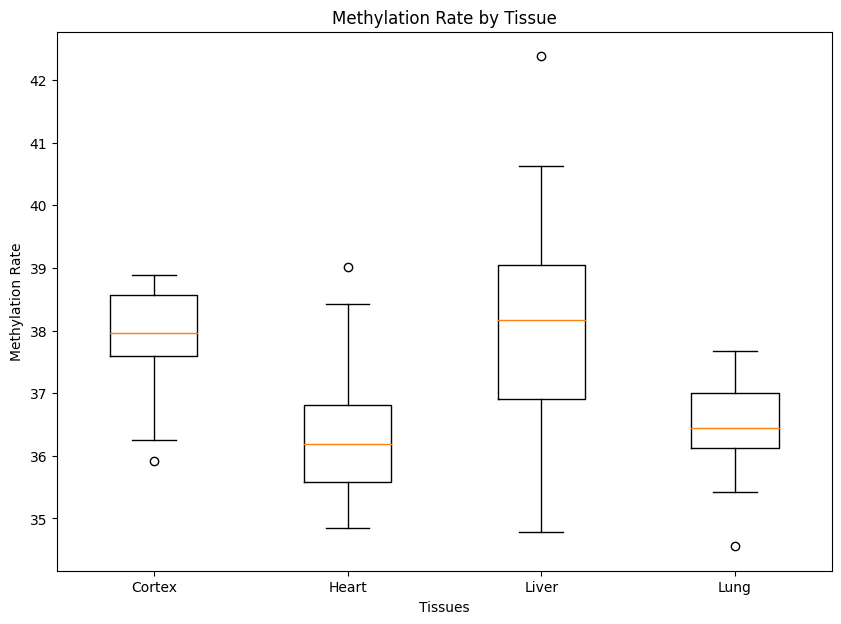

In [32]:
# fig, ax = plt.subplot()

# Setup overall figure and add a single plot to it
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot()

# Convert the df into series and plot said series to boxplots
grouped_data = df.groupby('tissue')['ave methylation'].apply(list)
data = grouped_data.values
bp = ax.boxplot(data)

# Label x & y columns
labels = grouped_data.index.tolist()
ax.set_xticklabels(labels)
ax.set_xlabel('Tissues')
ax.set_ylabel('Methylation Rate')

# Label Overall Figure and Display
plt.title('Methylation Rate by Tissue')
plt.show();

